### Importing csv file

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv("mushroom.csv")
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


### EDA

In [2]:
df.shape

(2000, 26)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [4]:
df = df.iloc[:, 1:]

In [5]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


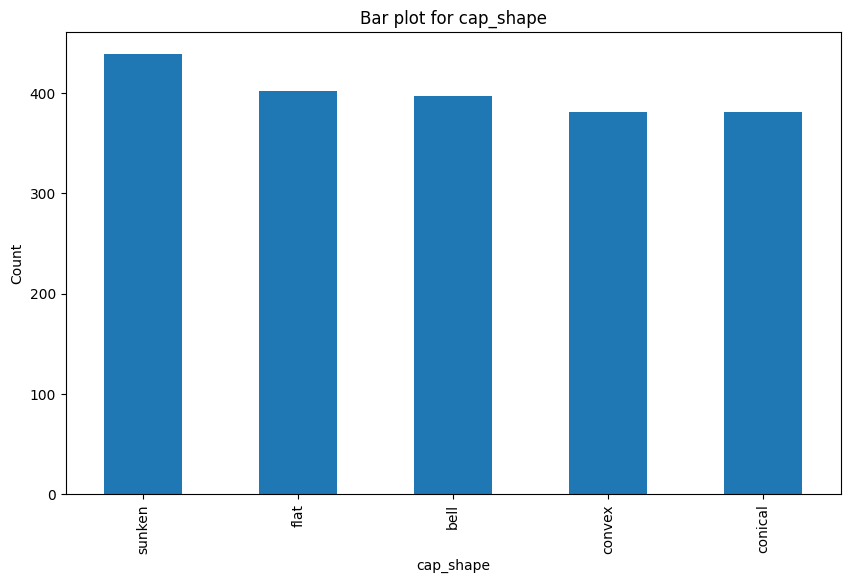

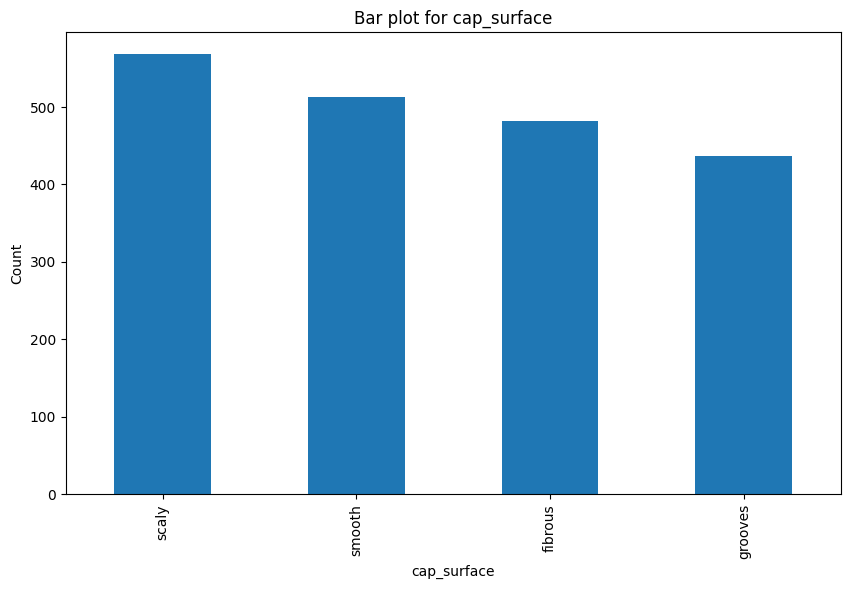

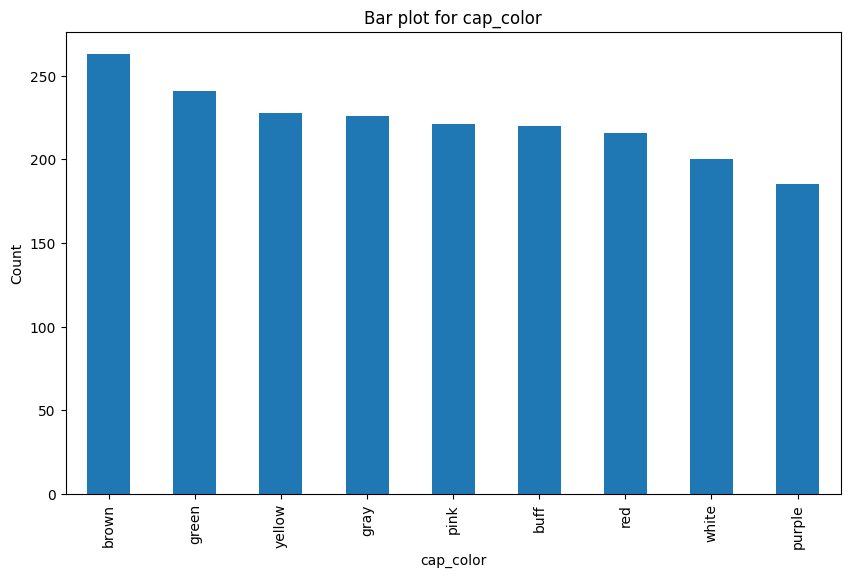

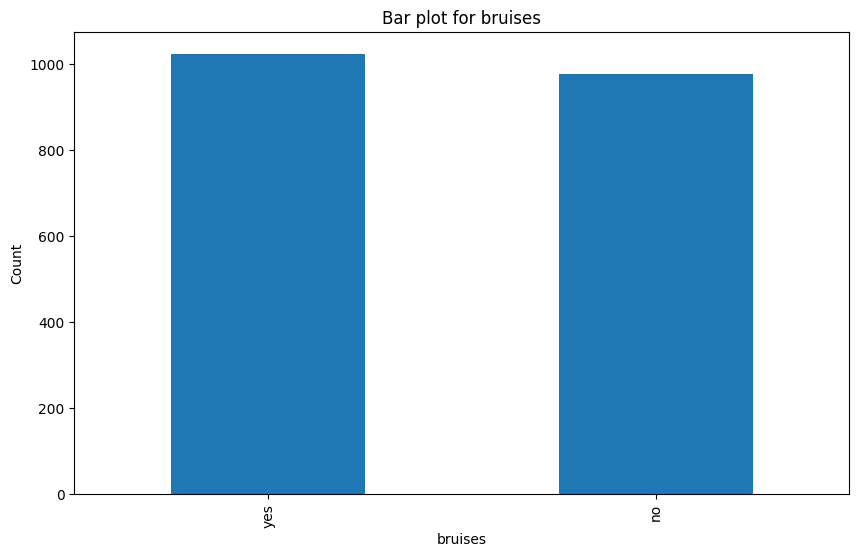

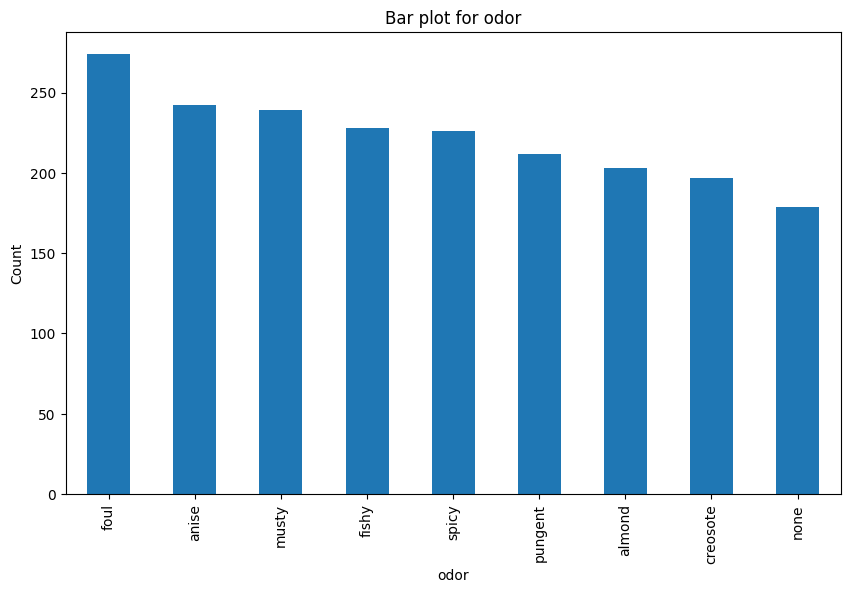

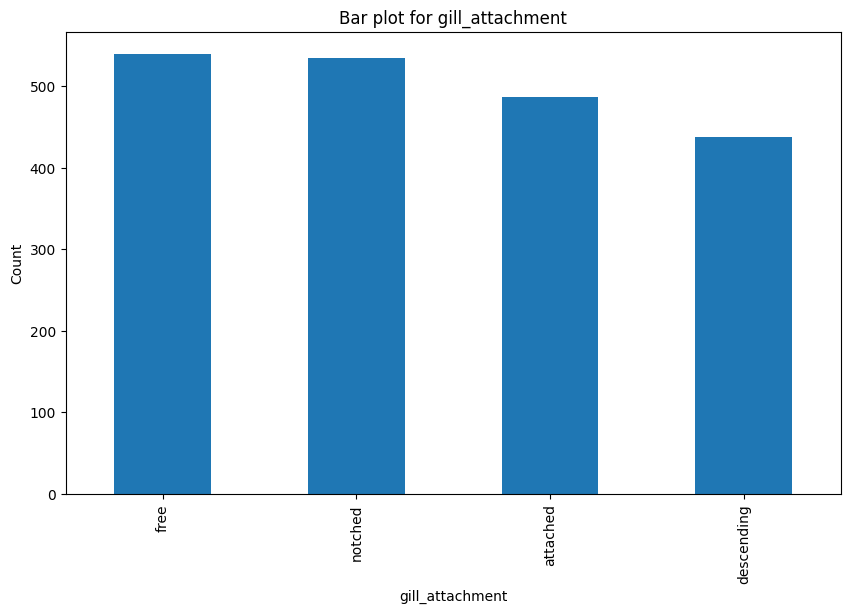

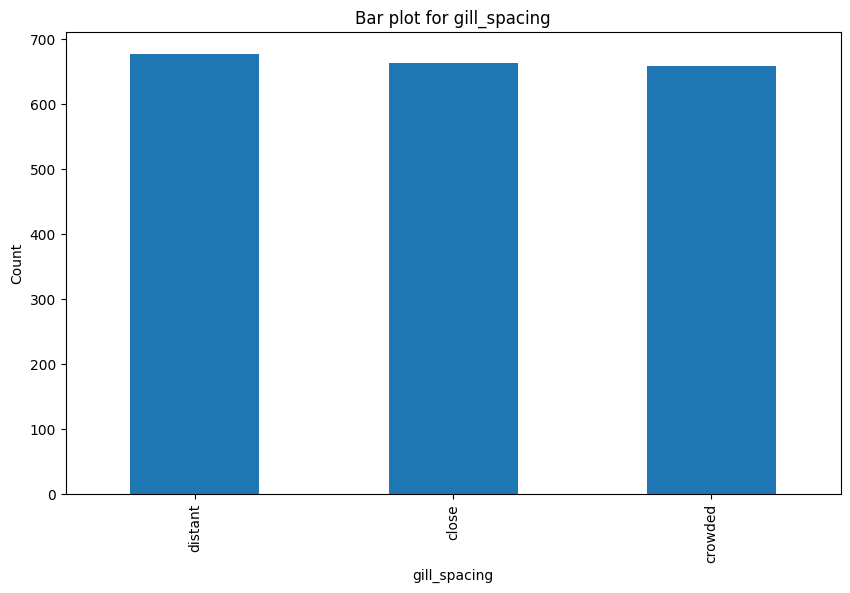

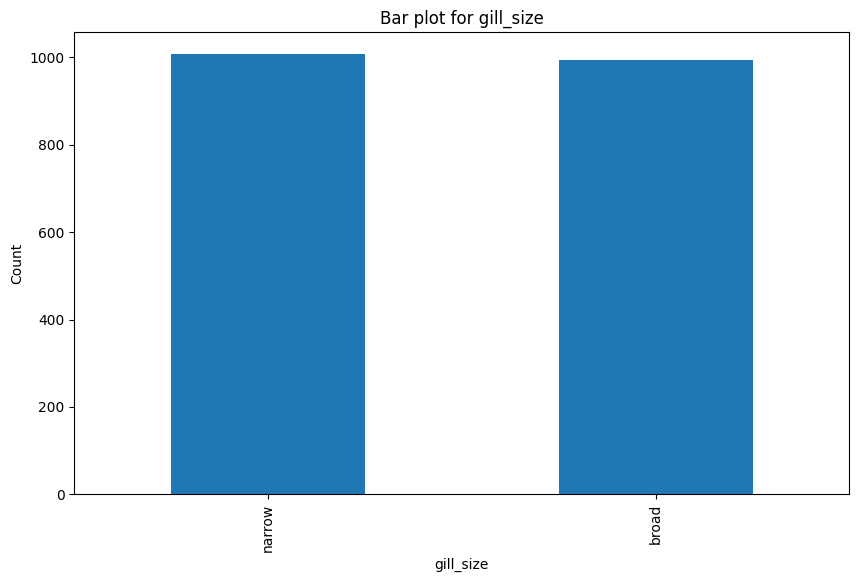

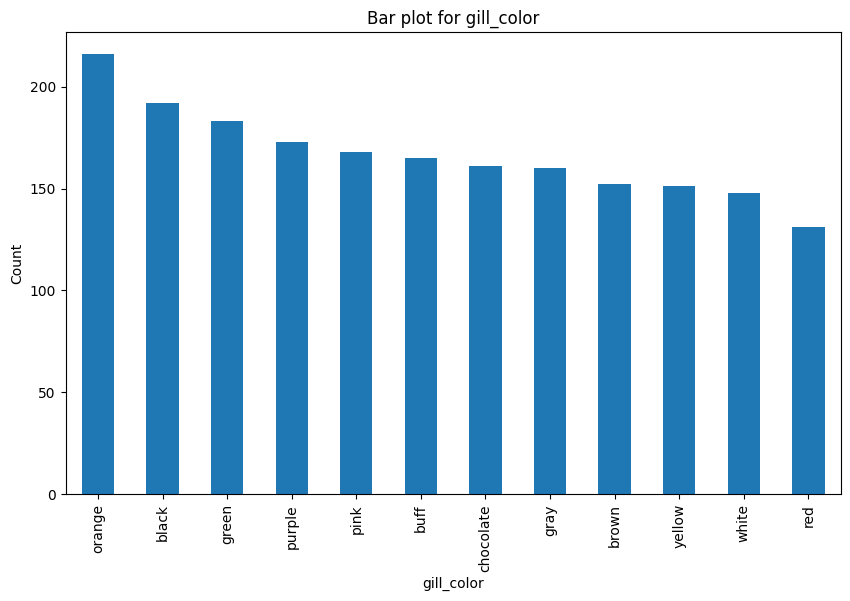

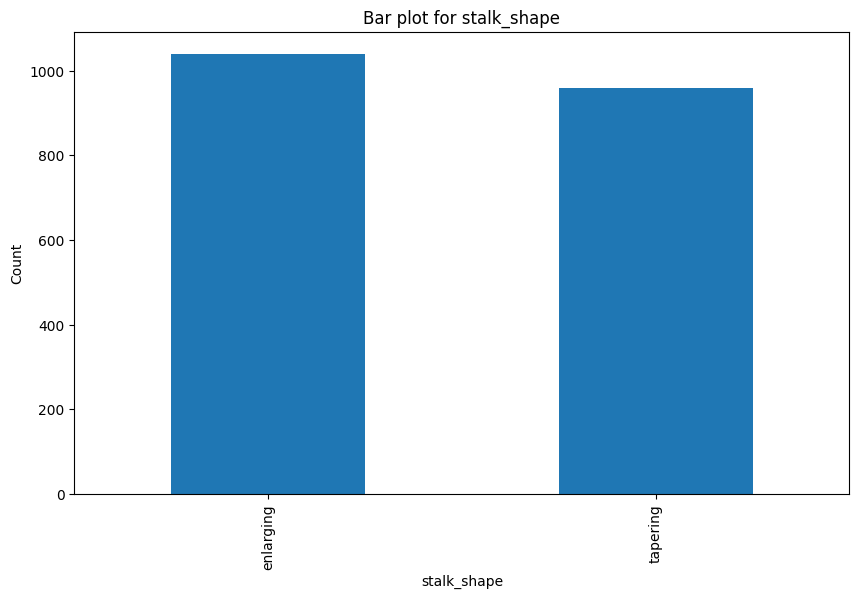

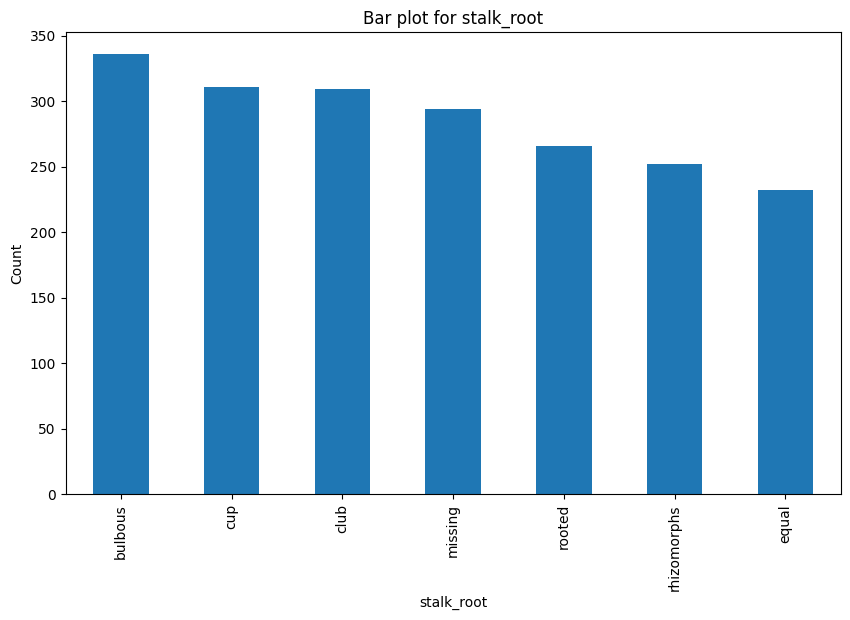

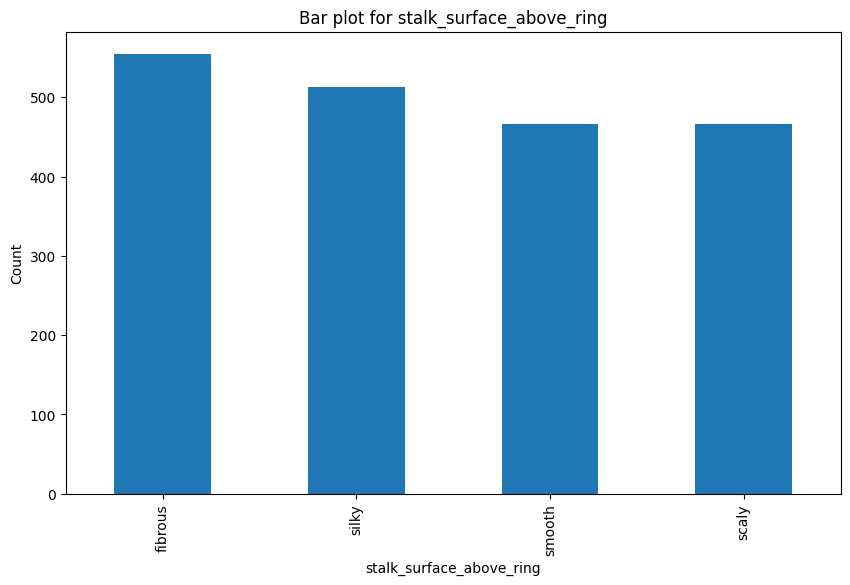

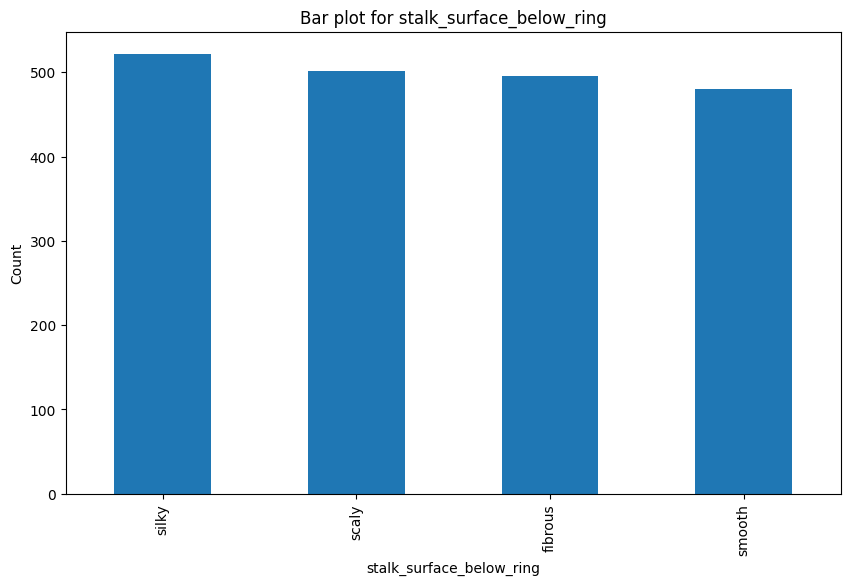

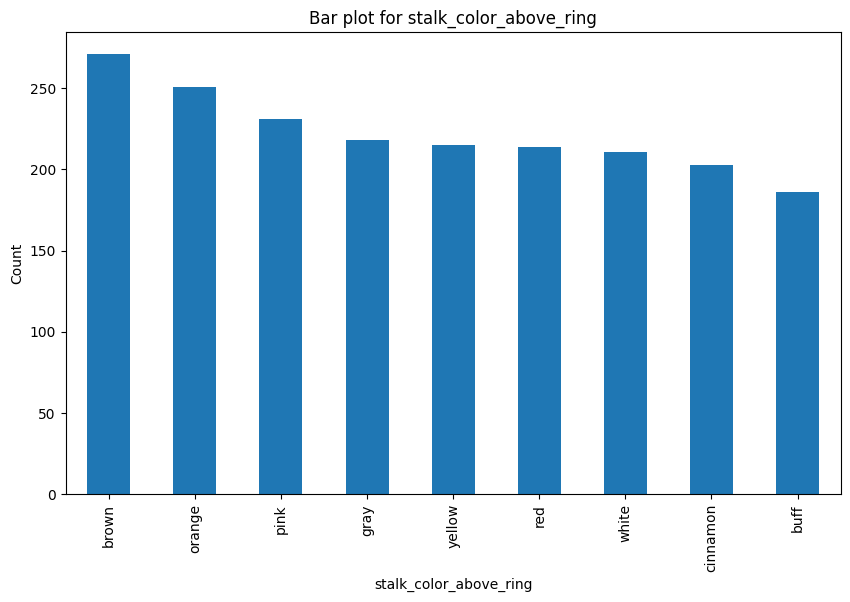

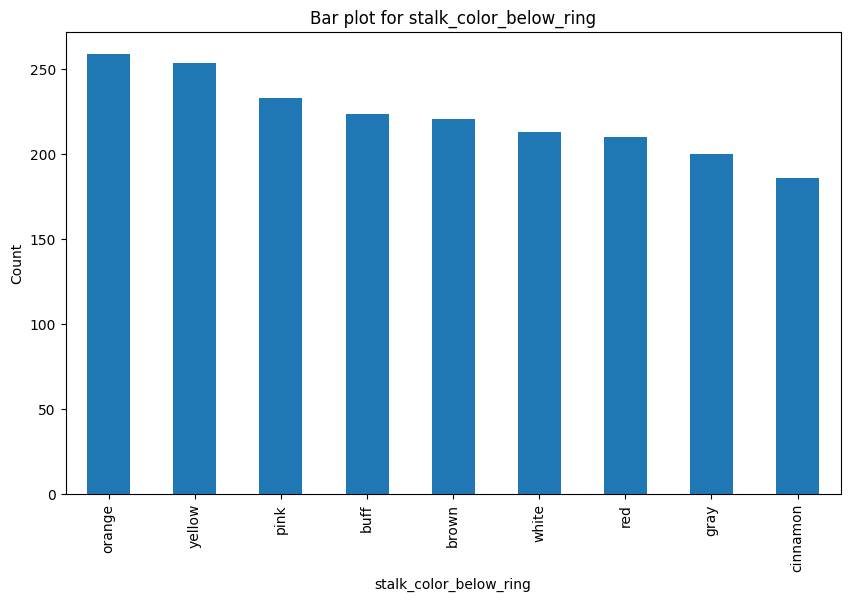

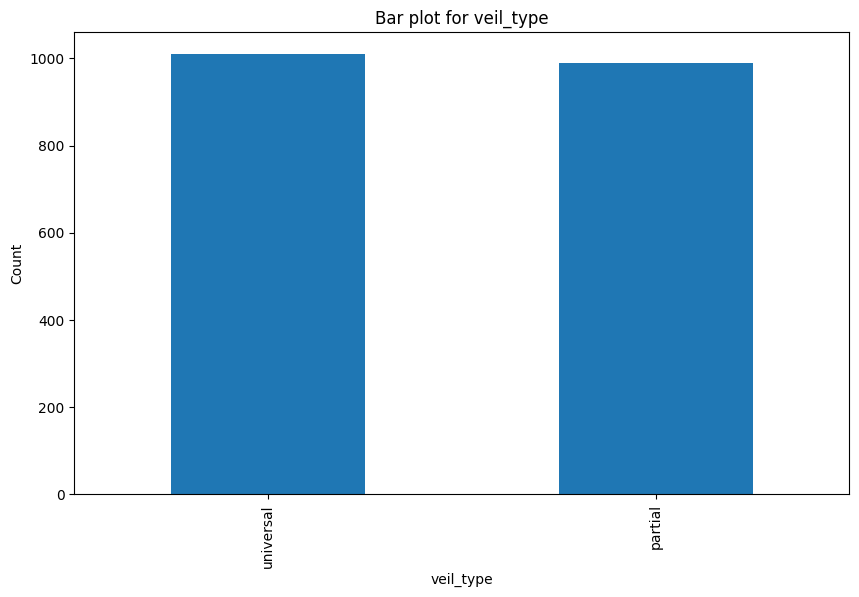

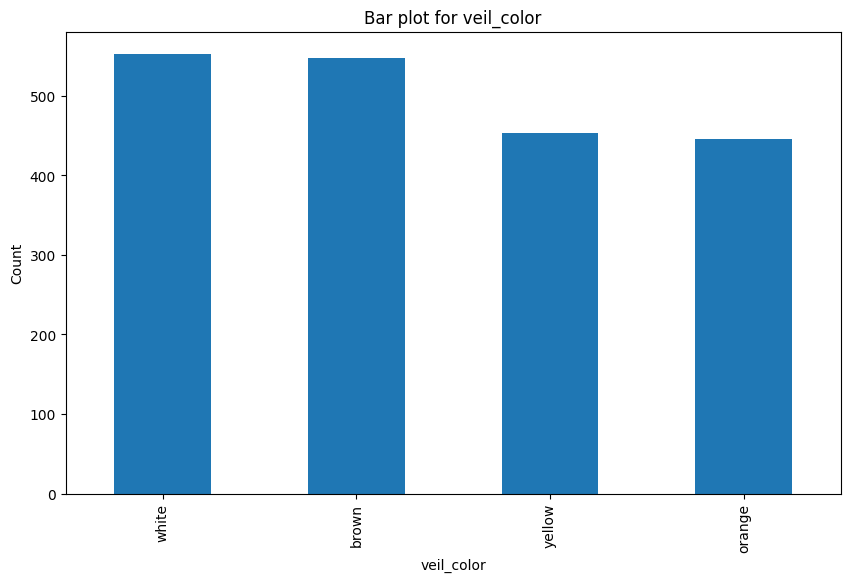

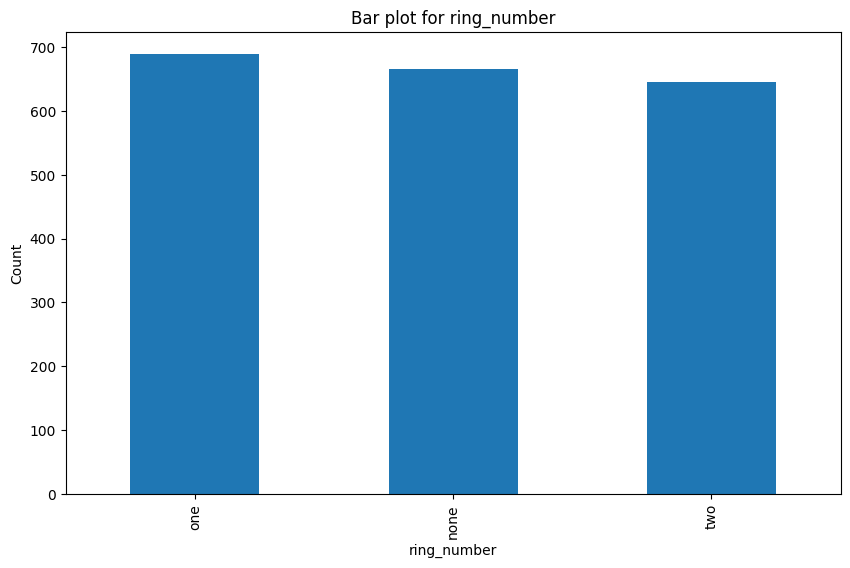

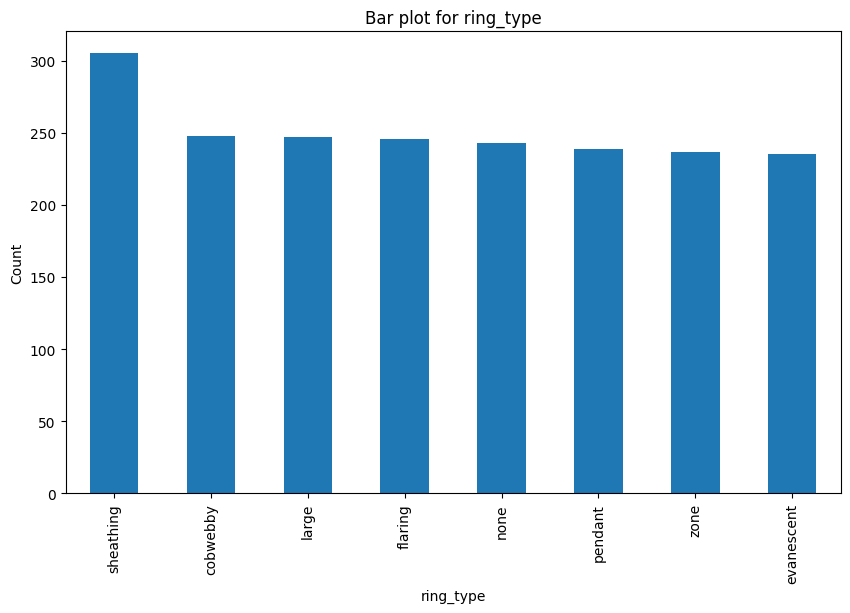

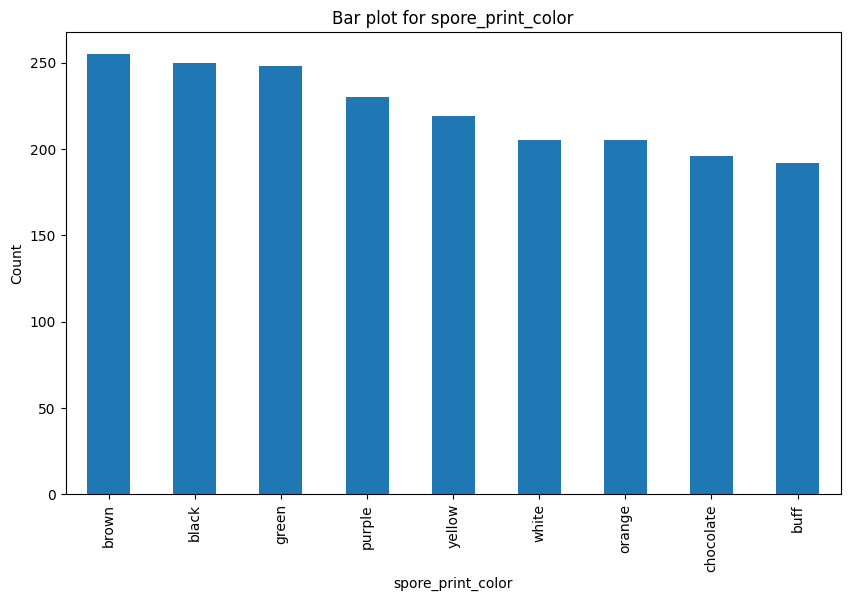

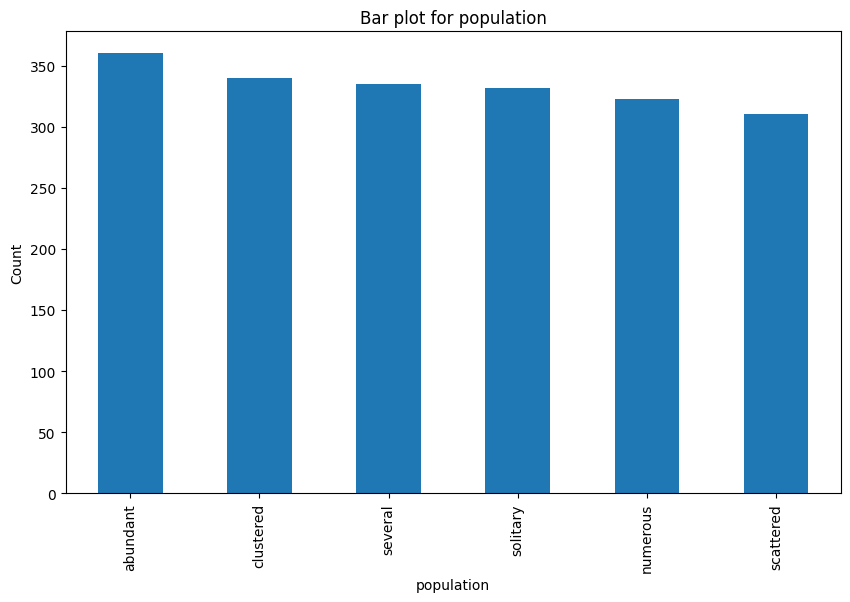

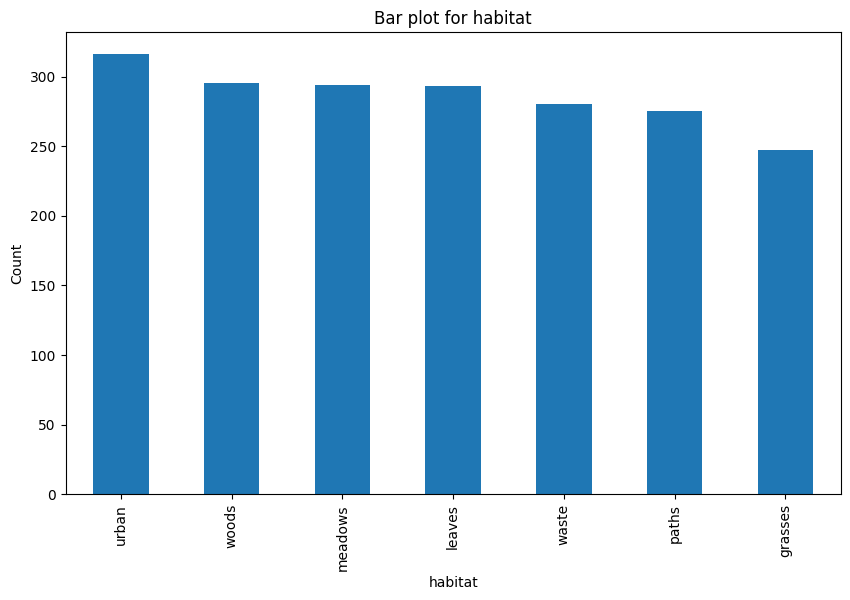

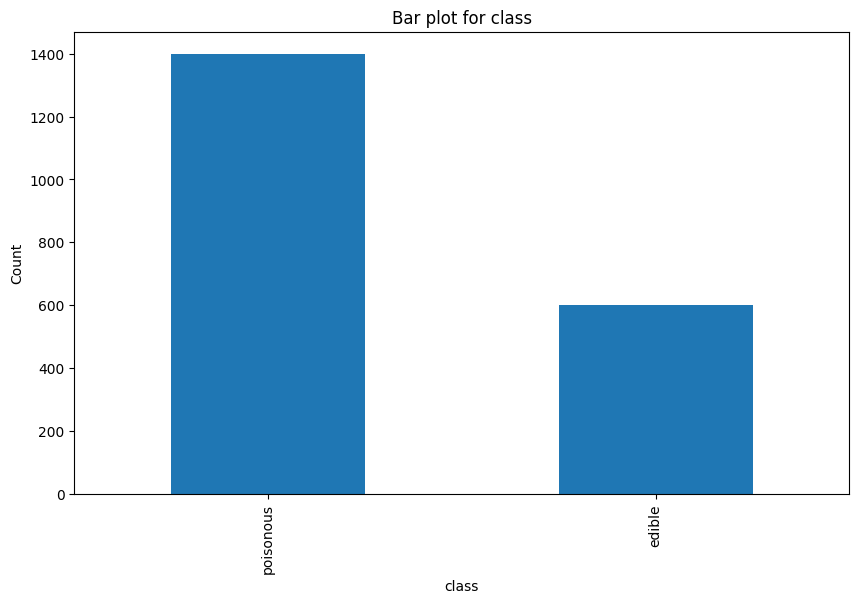

In [6]:


import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Bar plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


### Encoding


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
  if column not in ["stalk_height", "cap_diameter"]:
    df[column] = le.fit_transform(df[column])

df.head()


,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,14.276173,5.054983
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,3.952715,19.068319
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,9.054265,7.205884
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,5.226499,20.932692
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,14.037532,12.545245


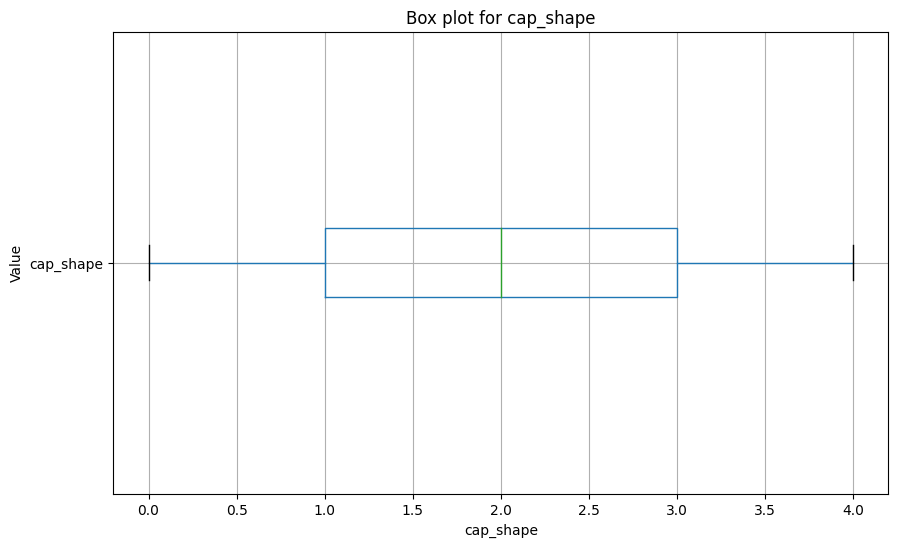

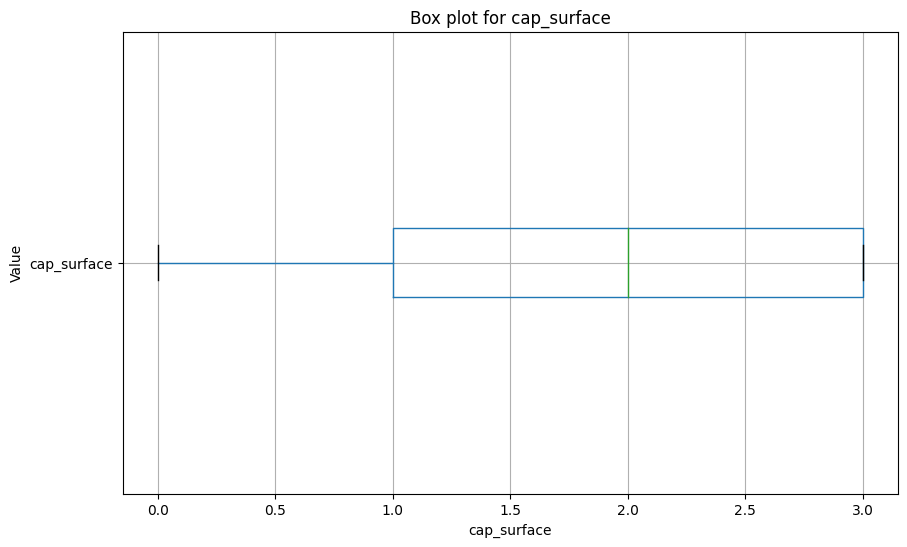

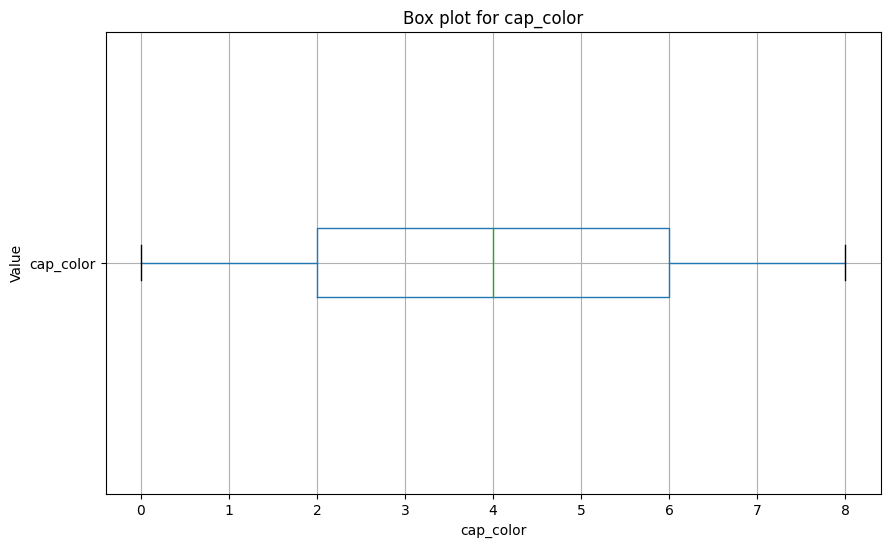

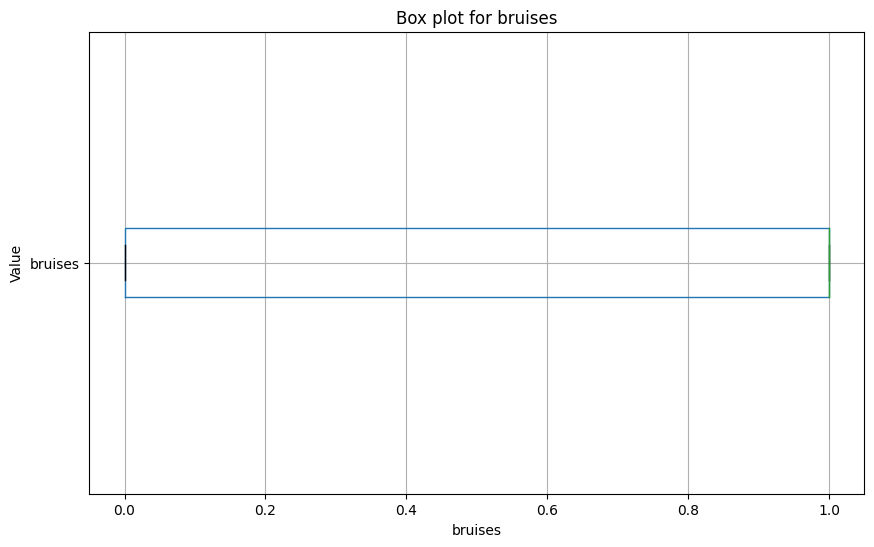

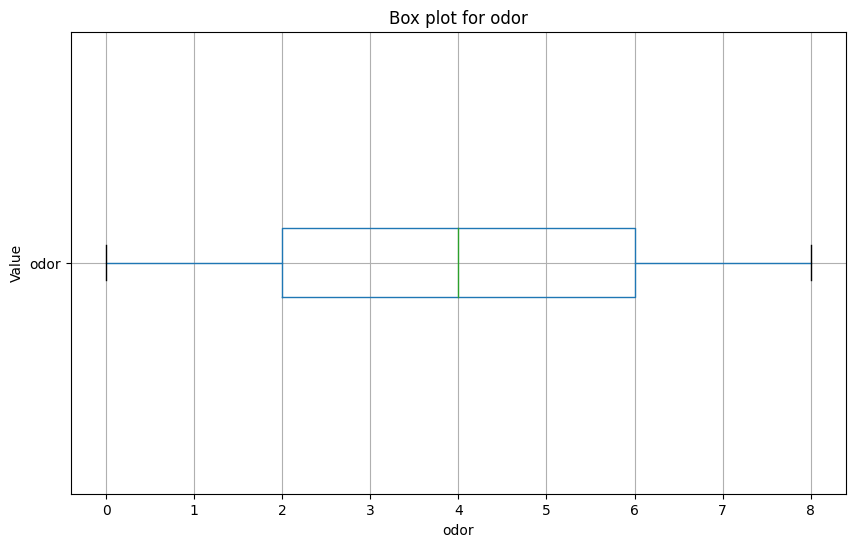

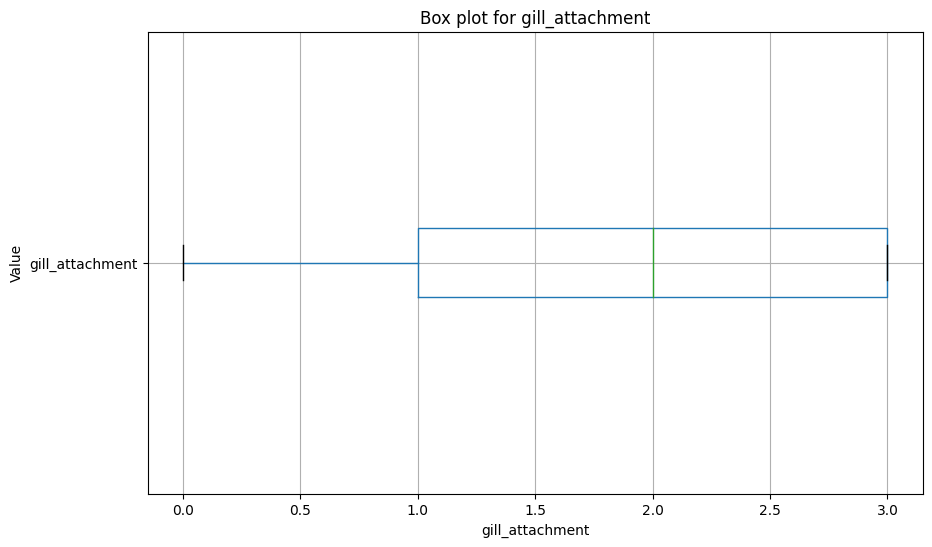

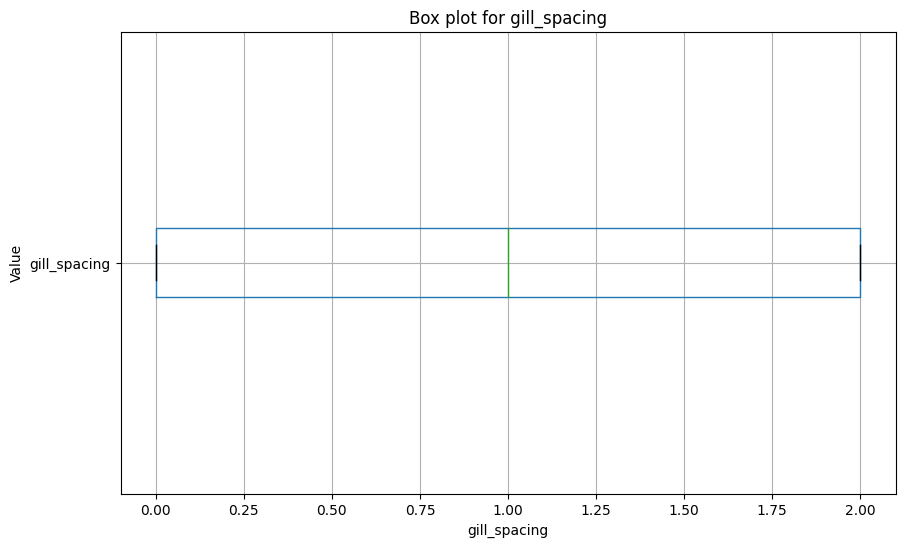

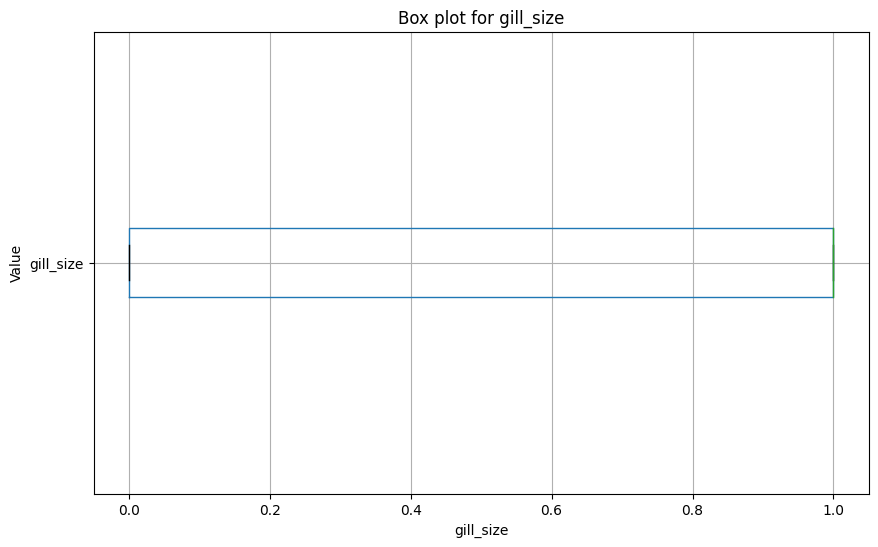

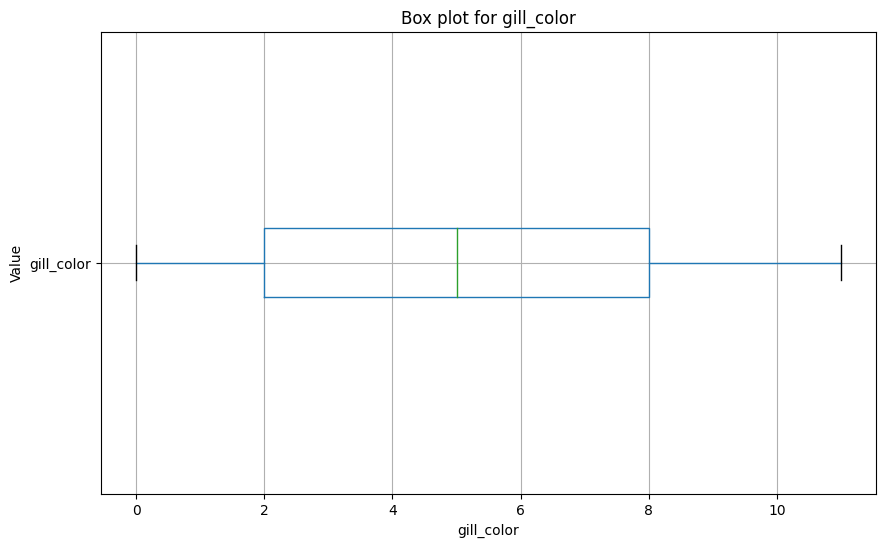

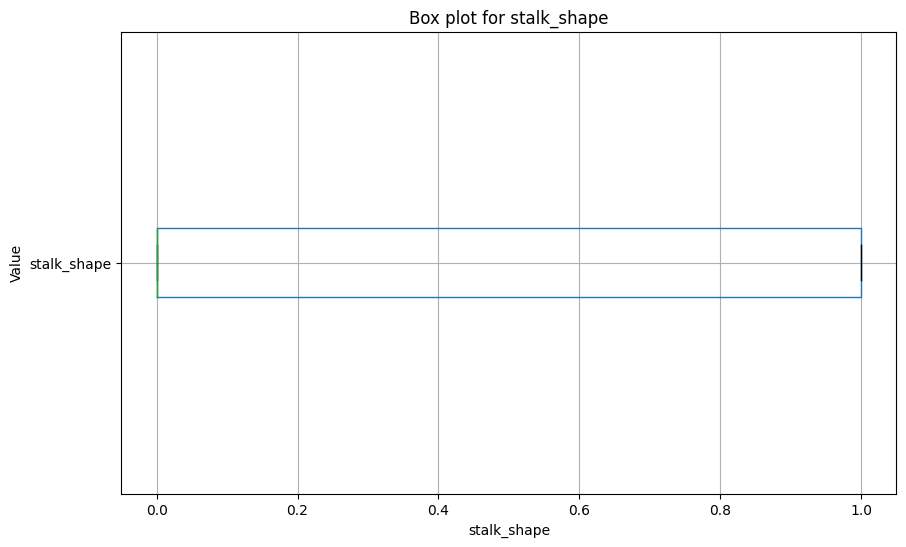

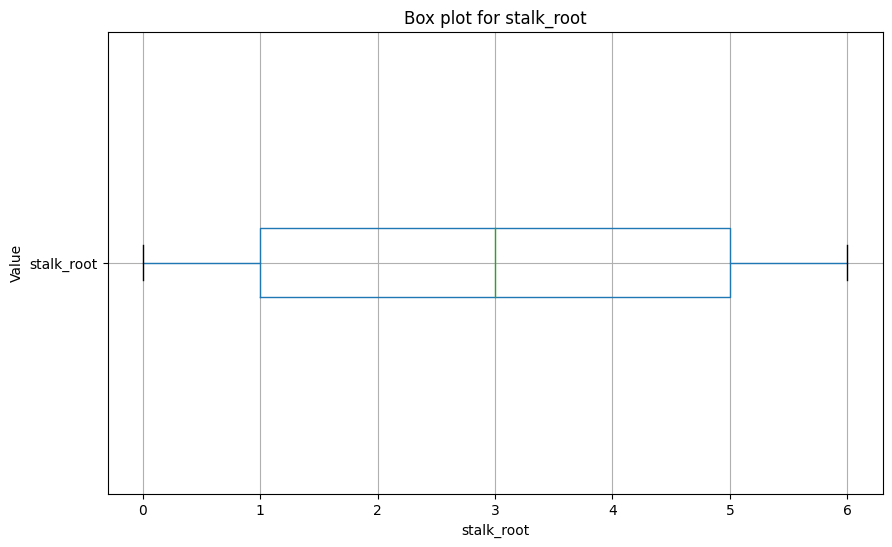

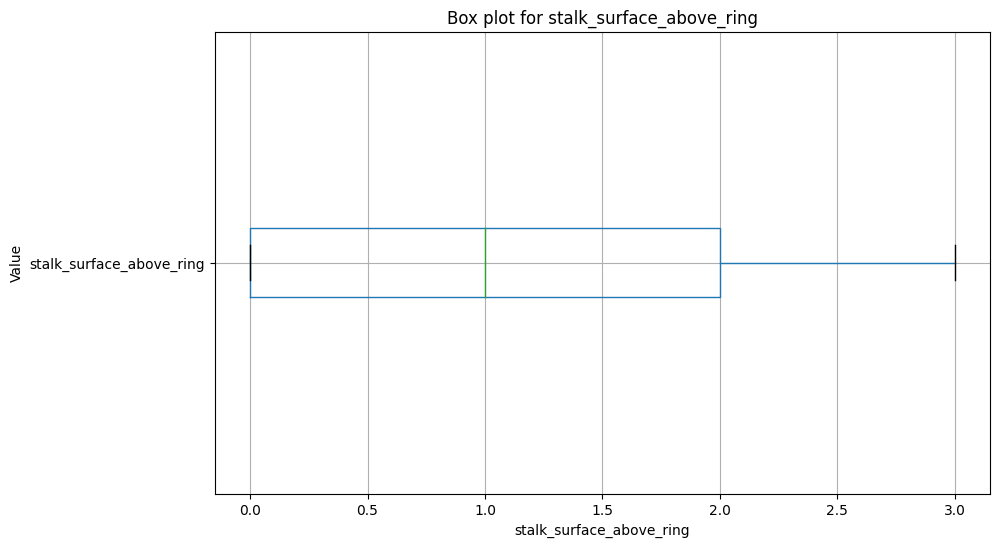

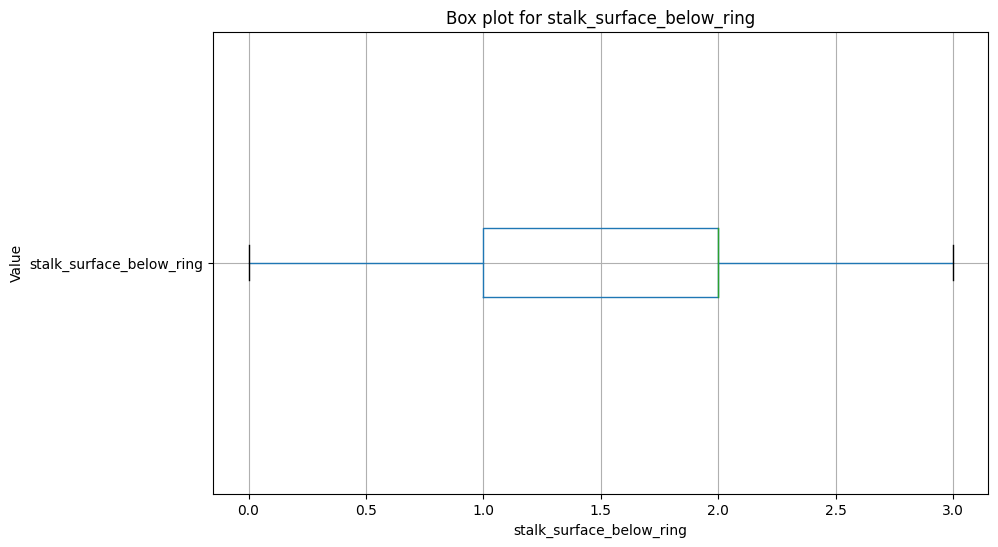

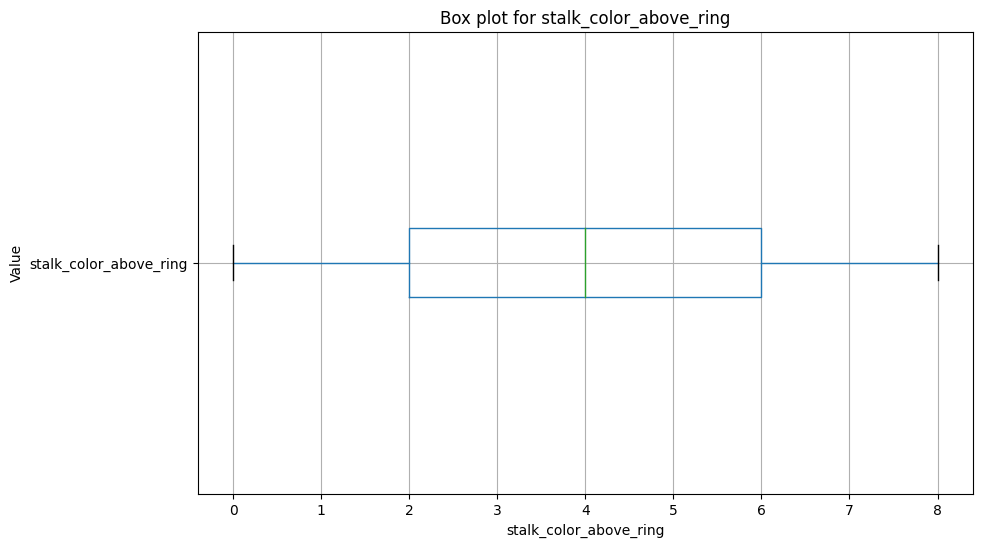

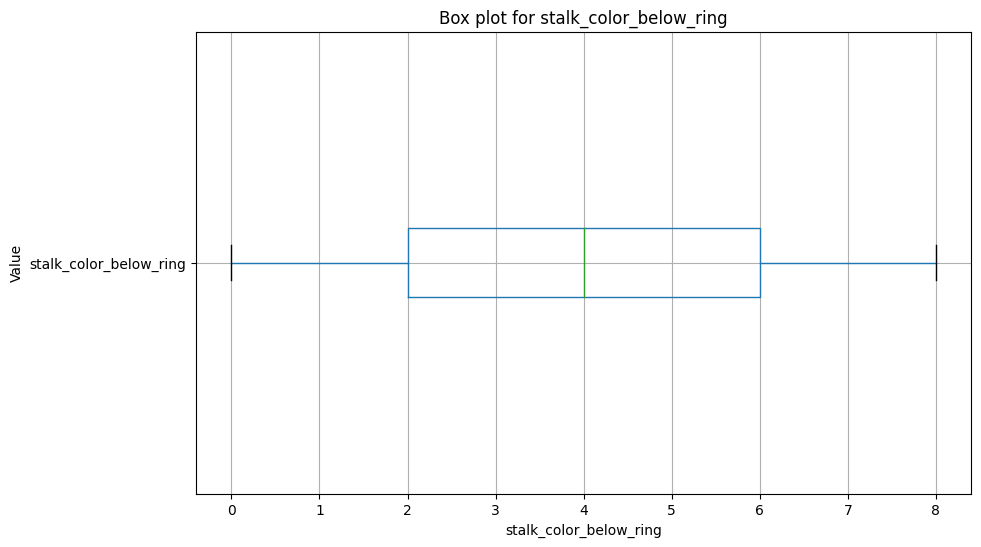

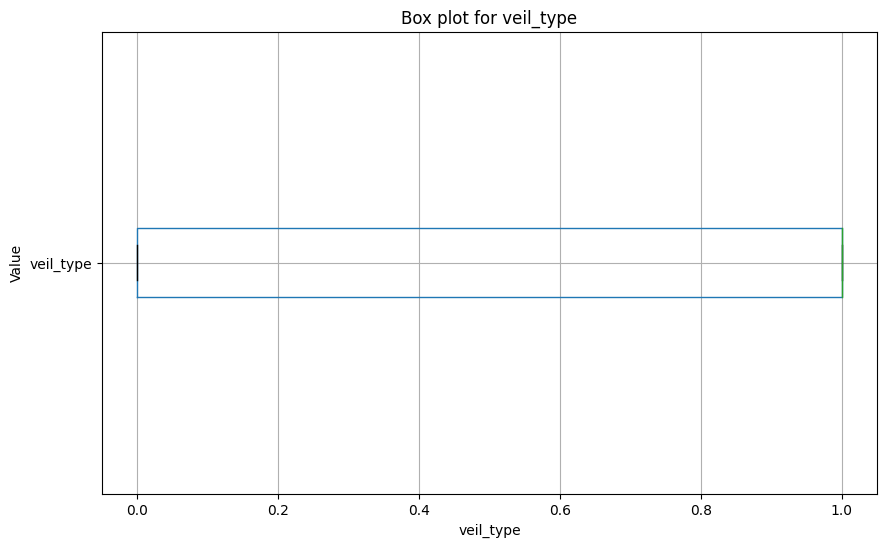

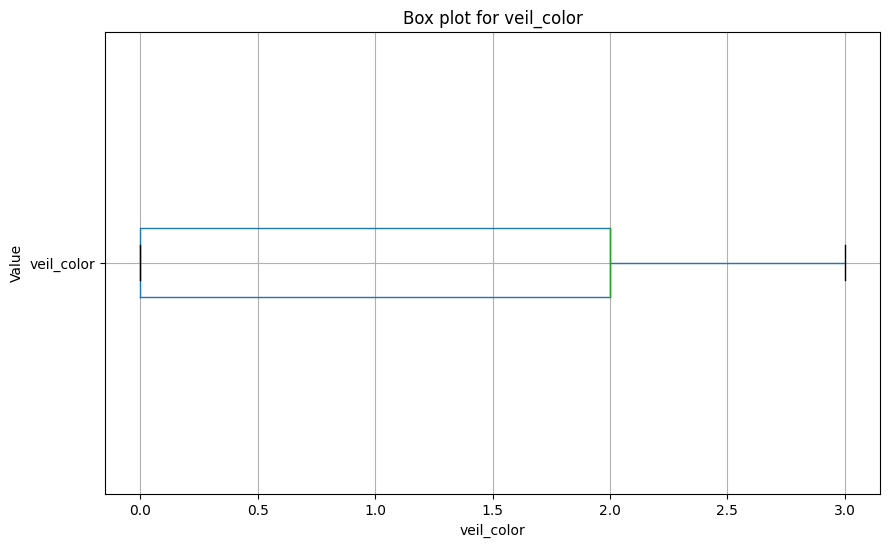

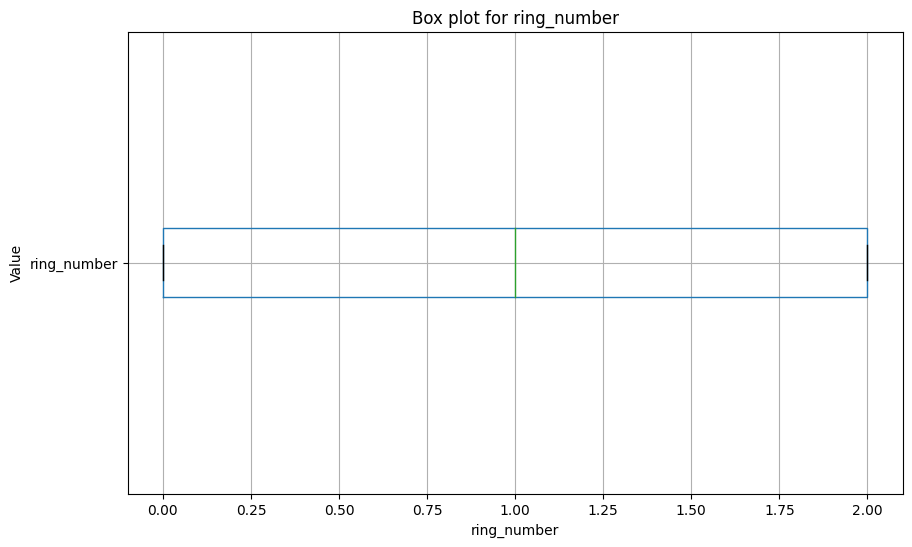

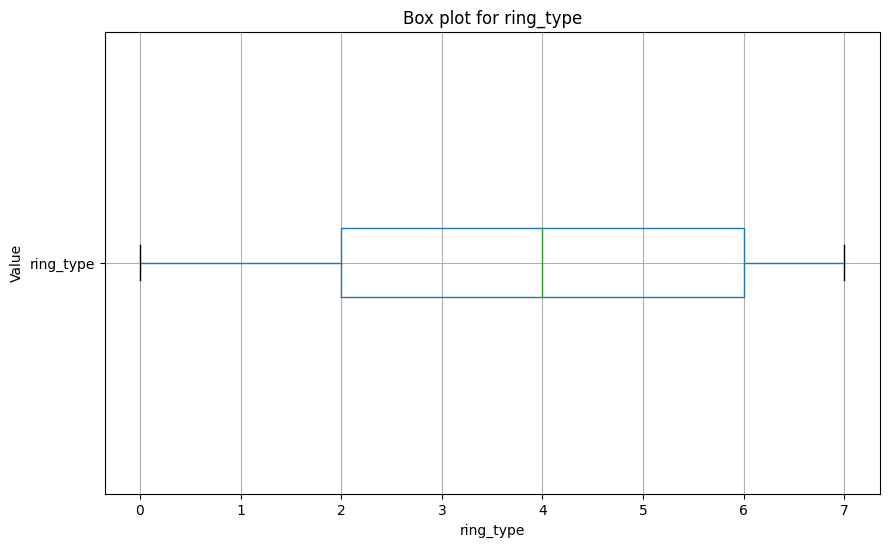

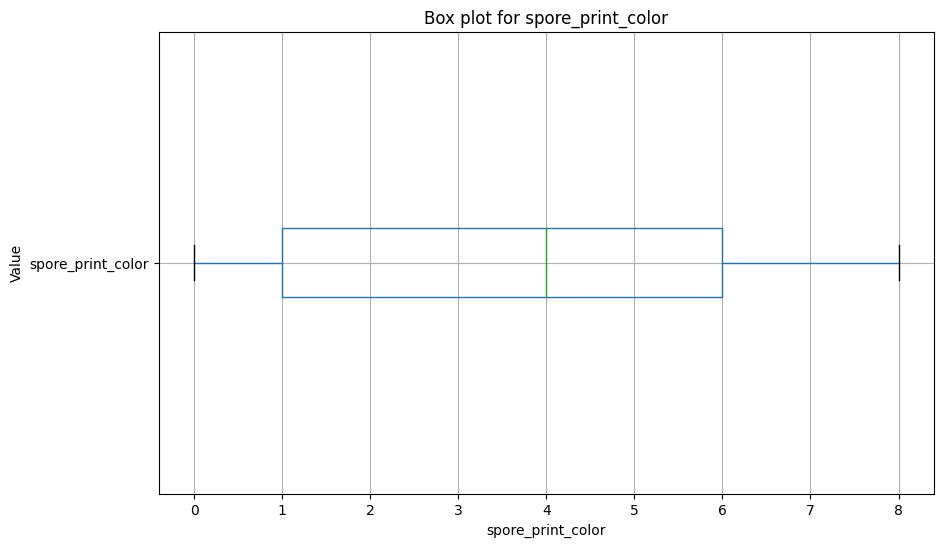

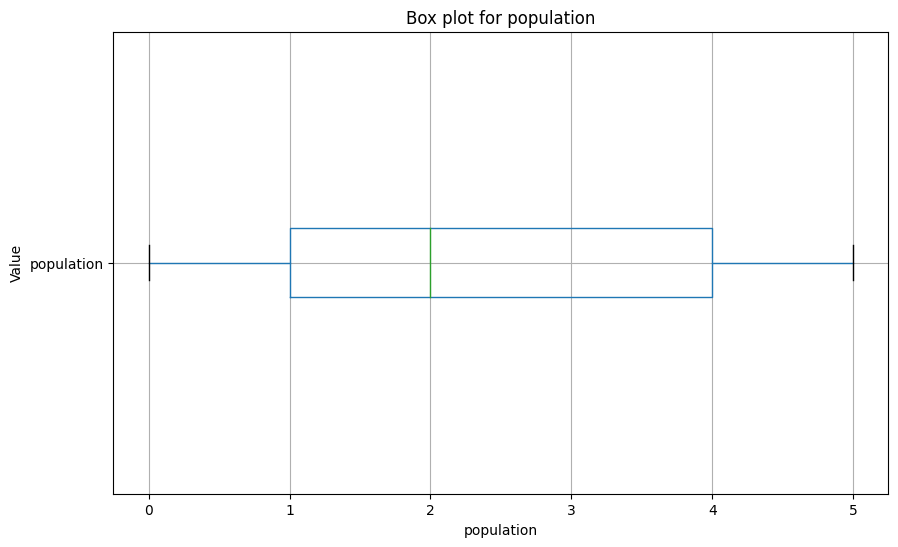

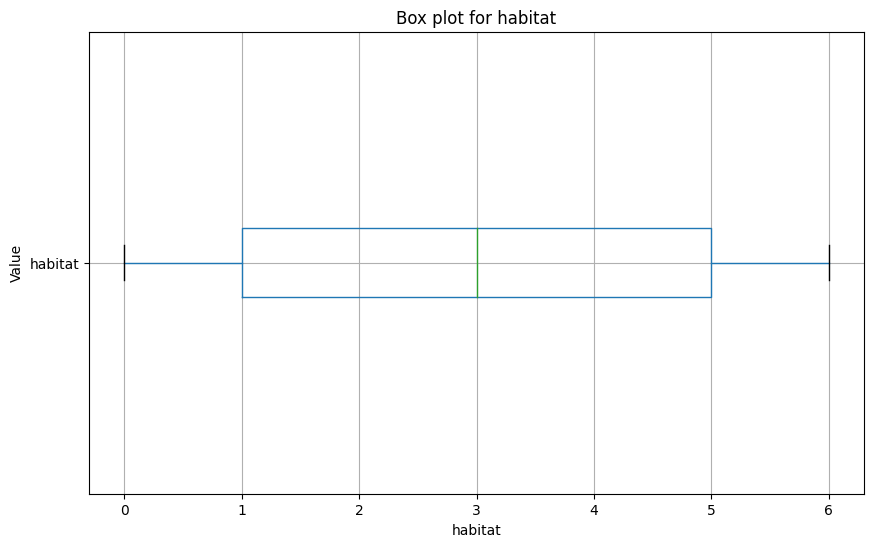

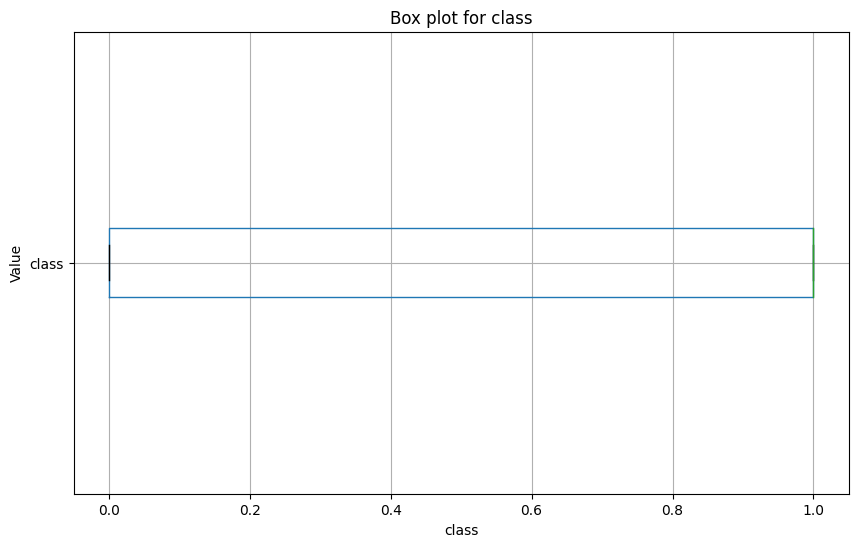

In [8]:


for column in df.columns:
  if column not in ["stalk_height", "cap_diameter"]:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=column, vert=False)
    plt.title(f"Box plot for {column}")
    plt.xlabel(column)
    plt.ylabel("Value")
    plt.show()


### Standardizing Numerical Values

In [9]:
from sklearn.preprocessing import StandardScaler

sclr= StandardScaler()
df[["stalk_height", "cap_diameter"]] = sclr.fit_transform(df[["stalk_height", "cap_diameter"]])
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,1.576459,-1.030123
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,-1.216463,0.958407
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,0.163717,-0.724904
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,-0.871852,1.222967
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,1.511897,0.032765


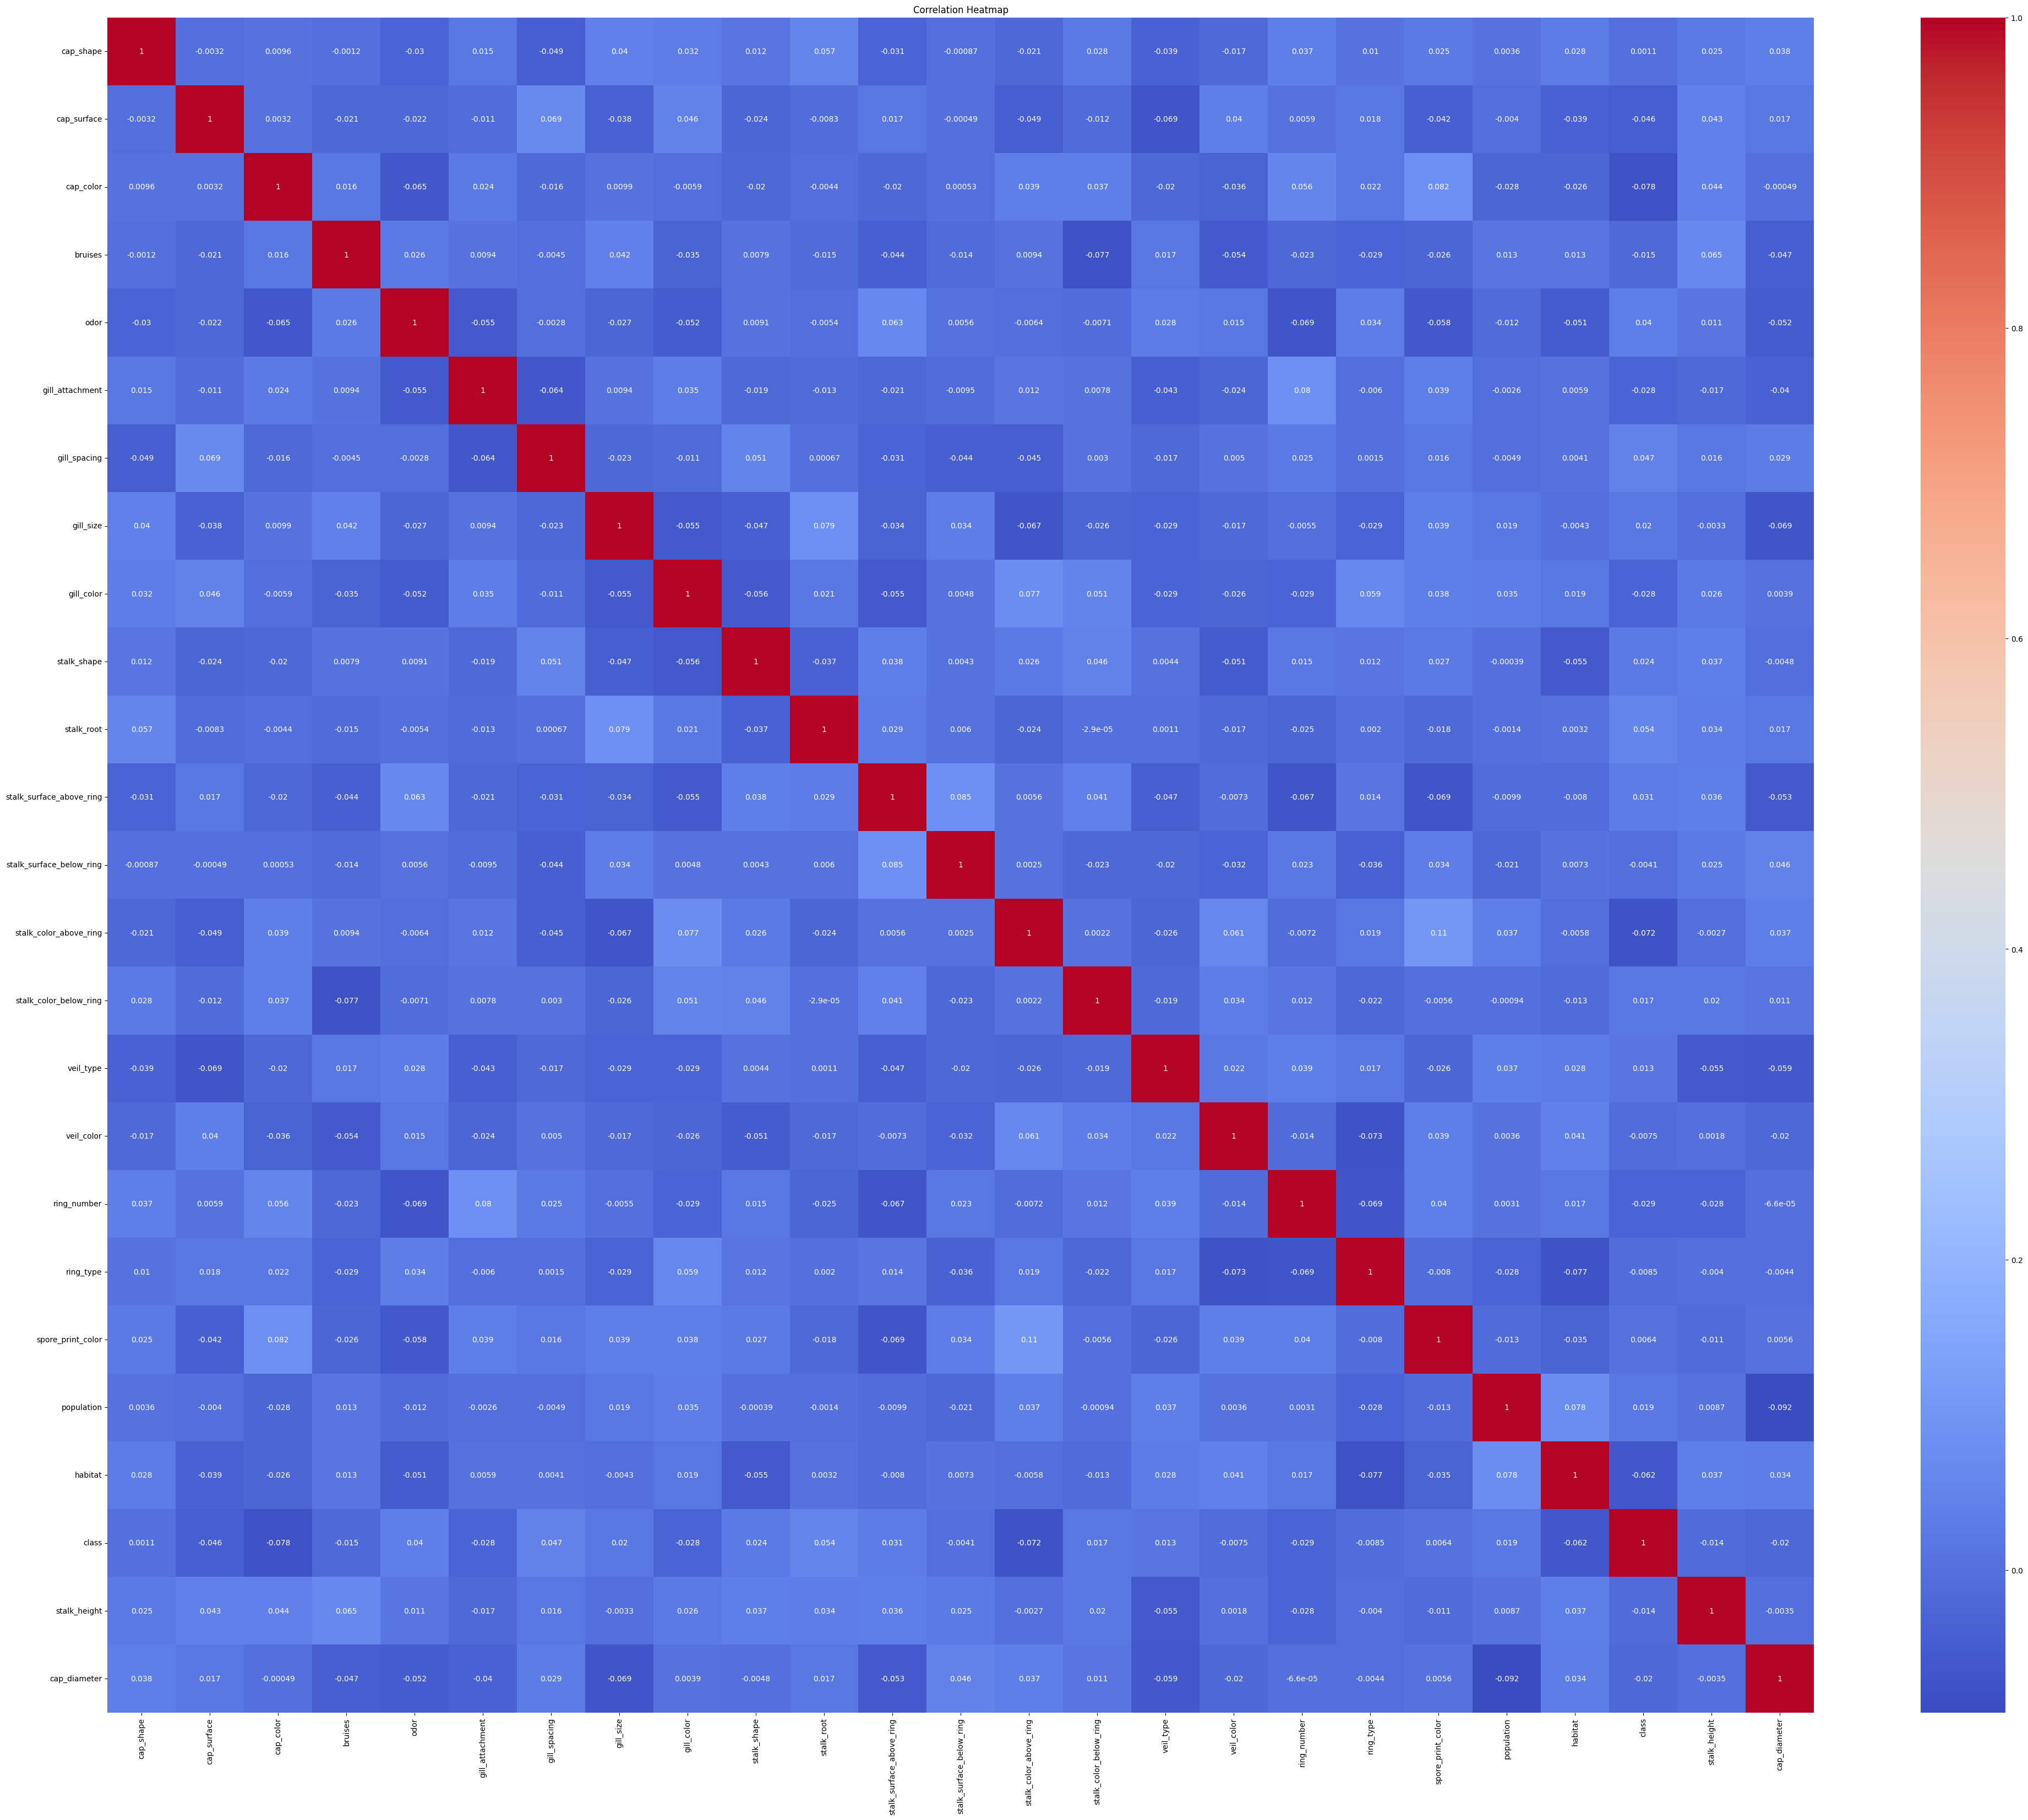

In [10]:
# prompt: generate correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 40))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### splitting the data into train , test

In [63]:
from sklearn.model_selection import train_test_split

X = df.drop("class", axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [69]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

svc = SVC()
svc.fit(X_train, y_train)
y_test_pred = svc.predict(X_test)
y_train_pred = svc.predict(X_train)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))





print(classification_report(y_test, svc.predict(X_test)))



Test Accuracy: 0.7325
              precision    recall  f1-score   support

           0       1.00      0.07      0.13       115
           1       0.73      1.00      0.84       285

    accuracy                           0.73       400
   macro avg       0.86      0.53      0.49       400
weighted avg       0.81      0.73      0.64       400



### Visualization of SVM Results

testing


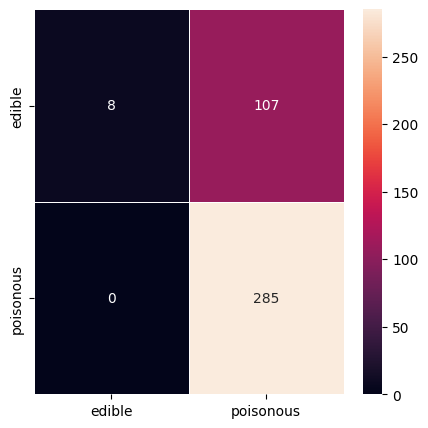

In [70]:


from sklearn.metrics import confusion_matrix

print('testing')

cm = confusion_matrix(y_test, y_test_pred)

labels = ["edible", "poisonous"]

fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, linewidth=0.6, linecolor="w", fmt=".0f", ax=ax)

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()




### Parameter Tuning and Optimization

In [67]:


from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.697 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.809 total time=   0.7s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.834 total time=   0.6s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.853 total time=   0.7s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.831 total time=   0.6s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.856 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [68]:
print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [71]:
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72       115
           1       0.85      1.00      0.92       285

    accuracy                           0.87       400
   macro avg       0.92      0.78      0.82       400
weighted avg       0.89      0.87      0.86       400



### Comparison and Analysis

In [73]:
accuracy_=[]

for kernel in ['rbf', 'poly', 'linear']:
    svc = SVC(kernel=kernel, C=1, gamma=1)
    svc.fit(X_train, y_train)
    y_test_pred = svc.predict(X_test)
    accuracy_.append(accuracy_score(y_test, y_test_pred))

df_accuracy = pd.DataFrame({'Kernel': ['rbf', 'poly', 'linear'], 'Accuracy': accuracy_})
print(df_accuracy)


   Kernel  Accuracy
0     rbf    0.8725
1    poly    0.8475
2  linear    0.7125


Analyze SVM strengths and weaknesses:

 Linear kernel might perform well with high-dimensional datasets like the Mushroom dataset.

Polynomial and RBF kernels might capture more complex relationships but could be prone to overfitting.


---



Discuss practical implications:
SVM can be used for classification tasks where the decision boundary is not necessarily linear.

SVM's ability to handle high-dimensional data and nonlinear relationships makes it suitable for various real-world applications, including image recognition, text classification, and bioinformatics.


---



---



---

